# MAT281 - Laboratorios N°07

<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [116]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe (1).csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

In [145]:
grupo1=df.loc[lambda x: x['grupo']=='Grupo_1']
grupo2=df.loc[lambda x: x['grupo']=='Grupo_2'].reset_index(drop=True)
grupo3=df.loc[lambda x: x['grupo']=='Grupo_3'].reset_index(drop=True)
grupo4=df.loc[lambda x: x['grupo']=='Grupo_4'].reset_index(drop=True)

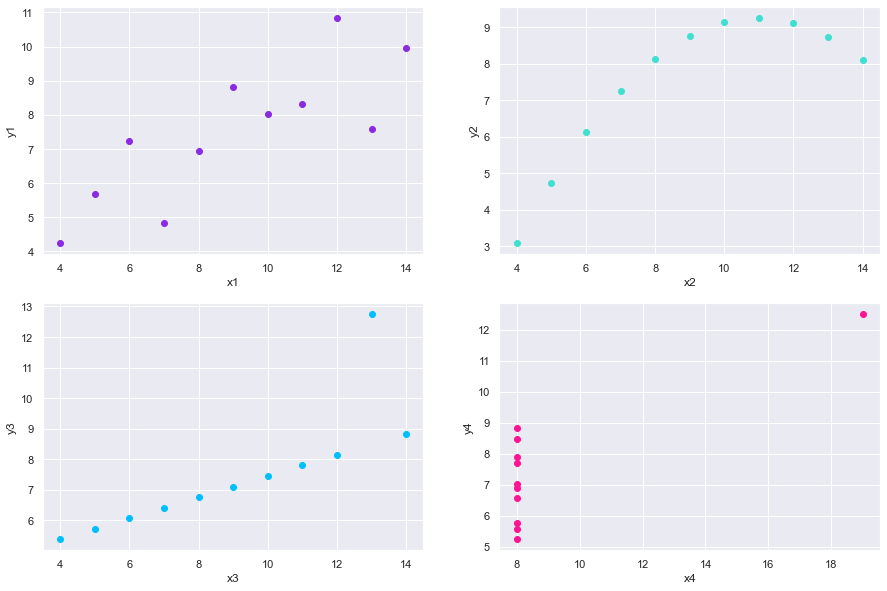

In [120]:
# datos
x1=grupo1.x
x2=grupo2.x
x3=grupo3.x
x4=grupo4.x
y1=grupo1.y
y2=grupo2.y
y3=grupo3.y
y4=grupo4.y

# grafico
fig = plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
plt.scatter(x1,y1,c="blueviolet")
plt.xlabel('x1')
plt.ylabel('y1')

plt.subplot(2,2,2)
plt.scatter(x2,y2,c="turquoise")
plt.xlabel('x2')
plt.ylabel('y2')

plt.subplot(2,2,3)
plt.scatter(x3, y3, c="deepskyblue")
plt.xlabel('x3')
plt.ylabel('y3')

plt.subplot(2,2,4)
plt.scatter(x4, y4, c="deeppink")
plt.xlabel('x4')
plt.ylabel('y4')
plt.show()


__Respuesta:__ Notamos que cada grupo es muy distinto entre si

In [121]:
grupo1.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [122]:
grupo2.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [123]:
grupo3.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [124]:
grupo4.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


__Respuesta:__ Notamos que los valores en x son los mismos en todos los grupos pero en y son distintos desde un punto en adelante

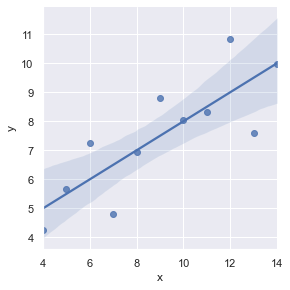

In [125]:
#Ajuste lineal Grupo 1
sns.lmplot(x='x',y='y',data=grupo1,height = 4)  
plt.show()

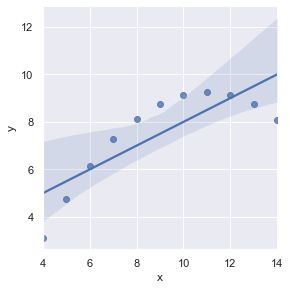

In [126]:
#Ajuste lineal Grupo 2
sns.lmplot(x='x',y='y',data=grupo2,height = 4)  
plt.show()

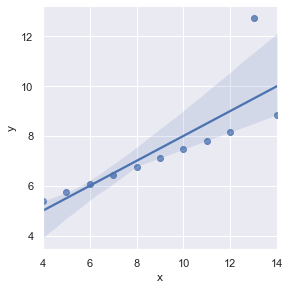

In [127]:
#Ajuste lineal Grupo 3
sns.lmplot(x='x',y='y',data=grupo3,height = 4)  
plt.show()

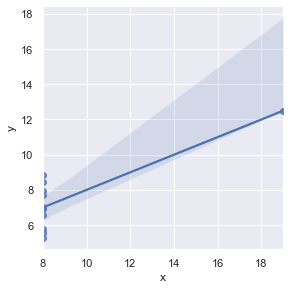

In [128]:
#Ajuste lineal Grupo 4
sns.lmplot(x='x',y='y',data=grupo4,height = 4)  
plt.show()

__Respuesta:__ Claramente el grupo 1 y el grupo 3 son a los que mejor les funciona el ajuste lineal gráficamente hablando, a diferencia del grupo 2 y el grupo 4 que claramente el ajuste lineal no es la mejor opción para hacer una regresión.

In [129]:
#no me funcionó lo mismo que sale en la clase del import y todo eso
def MAE(x,y):
    suma=0
    n=0
    for i in range(len(x)):
        suma+=abs(x[i]-y[i])
        n+=1
    mae=suma/n
    return mae 

def MSE(x,y):
    suma=0
    n=0
    for i in range(len(x)):
        suma+=(x[i]-y[i])**2
        n+=1
    mse=suma/n
    return mse   

def MAPE(x,y):
    suma=0
    n=0
    for i in range(len(x)):
        suma+=abs((x[i]-y[i])/x[i])
        n+=1
    mape=suma/n
    return mape  

def sMAPE(x,y):
    suma=0
    n=0
    for i in range(len(x)):
        suma+=abs((x[i]-y[i])/(abs(x[i])**2+abs(y[i])**2)/2)
        n+=1
    smape=suma/n
    return smape  

In [136]:
#Métricas grupo 1 
m1, n1 = np.polyfit(grupo1.x,grupo1.y, 1)
x1=[]
for i in grupo1.x:
    x1.append(m1*i+n1)
    
print('MAE:',MAE(x1,grupo1.y),'MSE:',MSE(x1,grupo1.y),'MAPE:',MAPE(x1,grupo1.y),'sMAPE:',sMAPE(x1,grupo1.y))   

MAE: 0.8374049586776856 MSE: 1.251153636363636 MAPE: 0.11483664557343481 sMAPE: 0.0042725042734952515


In [146]:
#Métricas grupo 2
m2, n2 = np.polyfit(grupo2.x,grupo2.y, 1)

x2=[]
for i in grupo2.x:
    x2.append(m2*i+n2)
    
print('MAE:',MAE(x2,grupo2.y),'MSE:',MSE(x2,grupo2.y),'MAPE:',MAPE(x2,grupo2.y),'sMAPE:',sMAPE(x2,grupo2.y))  

MAE: 0.9679338842975209 MSE: 1.2523900826446281 MAPE: 0.13679841606535662 sMAPE: 0.005811385305935043


In [147]:
#Métricas grupo 3
m3, n3 = np.polyfit(grupo3.x,grupo3.y, 1)

x3=[]
for i in grupo3.x:
    x3.append(m3*i+n3)

print('MAE:',MAE(x3,grupo3.y),'MSE:',MSE(x3,grupo3.y),'MAPE:',MAPE(x3,grupo3.y),'sMAPE:',sMAPE(x3,grupo3.y))      

MAE: 0.715966942148761 MSE: 1.2505628925619834 MAPE: 0.08453019401589149 sMAPE: 0.0024423321814462935


In [149]:
#Métricas grupo 4
m4, n4 = np.polyfit(grupo4.x,grupo4.y, 1)
x4=[]
for i in grupo4.x:
    x4.append(m4*i+n4)

print('MAE:',MAE(x4,grupo4.y),'MSE:',MSE(x4,grupo4.y),'MAPE:',MAPE(x4,grupo4.y),'sMAPE:',sMAPE(x4,grupo4.y))  

MAE: 0.9027272727272727 MSE: 1.249317272727273 MAPE: 0.12894261858695513 sMAPE: 0.004700513502143875


__Respuesta:__ Para el grupo 1 el ajuste lineal funciona perfecto, para el grupo 3 habría que eliminar el valor que se aleja más que los otros, para el grupo 2 habría que intentar con algún modelo no lineal y para el grupo 4 también.